## Regression

Regression is a supervised learning technique. There are three types of regression:
- Linear regression, used to predict a continuous value, such as a house price, based on an input variable, such as square footage.
- Poisson's regression, used to predict a count, such as the number of times a person will visit a website, based on an input variable, such as the number of times a person has visited the website.
- Logistic regression, used to predict a class, typically binary value, such as whether a person has a disease, based on an input variable, such as age.

## Linear Regression

We will use  linear regression to introduce some machine learning concepts. We will build a model. A model is a mathematical function that takes one or more inputs and produces one or more output, in an effort to simulate a real-world process.

In this case, we will use a model to predict the price of a house based on its size. We will use the following data set to train our model:



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/data/prices-size.csv"
data = pd.read_csv(url)
data.drop('House', axis=1, inplace=True)
data

,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot
0,1360,3,2.0,NW,1,145000,1240,18000
1,1050,1,1.0,NW,1,68000,370,25000
2,1010,3,1.5,NW,1,115000,1130,25000
3,830,3,2.0,SW,0,69000,1120,17000
4,2150,3,2.0,NW,1,163000,1710,14000
...,...,...,...,...,...,...,...,...
95,990,2,2.0,NW,1,176000,1060,27500
96,3030,3,2.0,SW,0,196500,1730,47400
97,1580,3,2.0,NW,1,132200,1370,18000
98,1770,3,2.0,NE,0,88400,1560,12000


In [2]:
data.describe()

,Taxes,Bedrooms,Baths,NW,price,size,lot
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1668.200000,2.990000,1.890000,0.750000,126698.000000,1526.300000,19417.000000
std,1009.280552,0.658971,0.515321,0.435194,56356.774718,557.116775,8524.309327
min,20.000000,1.000000,1.000000,0.000000,21000.000000,370.000000,3500.000000
25%,970.000000,3.000000,1.875000,0.750000,86875.000000,1157.500000,12875.000000
50%,1535.000000,3.000000,2.000000,1.000000,123750.000000,1410.000000,18000.000000
75%,2042.500000,3.000000,2.000000,1.000000,153075.000000,1760.000000,25000.000000
max,4900.000000,5.000000,3.000000,1.000000,338000.000000,4050.000000,47400.000000


C:\Users\tony.benbrahim\AppData\Local\Temp\ipykernel_98632\397398489.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")


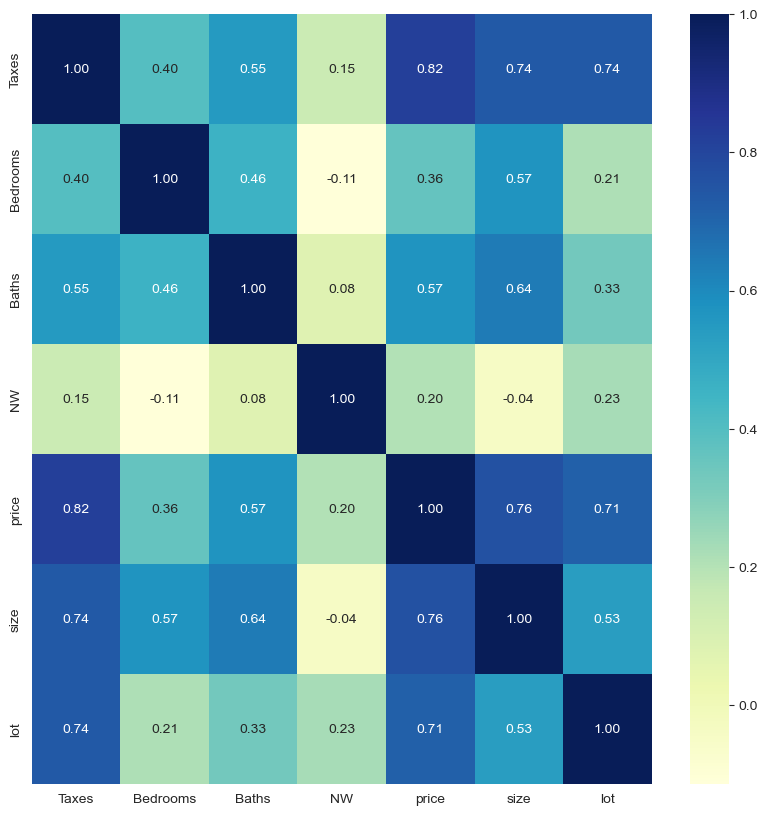

In [3]:
# show data correlation chart with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()



<Axes: title={'center': 'Price vs Size'}, xlabel='Size (sq ft)', ylabel='Price ($)'>

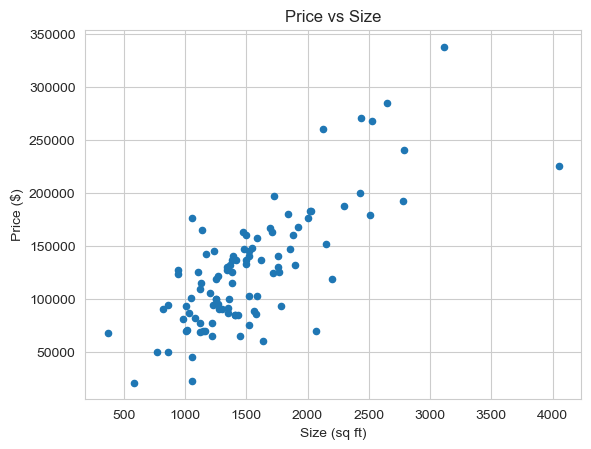

In [4]:
def plot_points():
    points_plt = data.plot.scatter(x='size', y='price')
    points_plt.set_title('Price vs Size')
    points_plt.set_xlabel('Size (sq ft)')
    points_plt.set_ylabel('Price ($)')
    return points_plt


plot_points()

## Linear Regression

We can draw the line that best fits the data. The line is called a **regression line**.  There is a formula to determine the line. The formula is called the **least squares method**.


$m = \frac{N \sum(xy) - \sum(x) \sum(y)}{N \sum(x^2) - (\sum(x))^2}$

$b = \frac{\sum(y) - m \sum(x)}{N}$

The formulas are provided for information only and works for a model with 1 input and 1 output. This will not generalize to a model with multiple inputs and outputs, so we will not use the formulas in the future. Rather, we will develop a method to determine the line that best fits the data and will later generalize to multiple inputs and outputs.



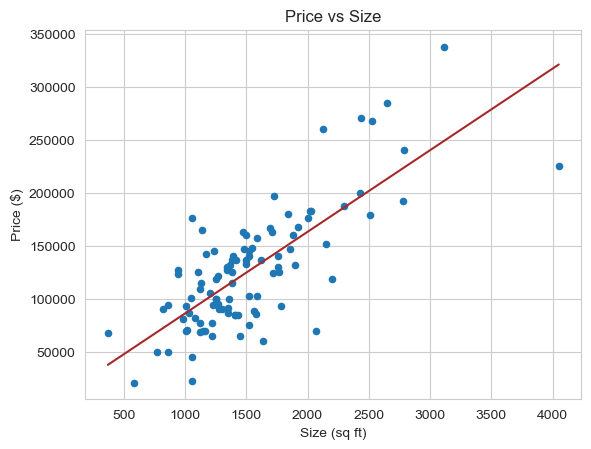

In [5]:
import numpy as np

plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')


In [6]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
prices = data.iloc[:, 5].values.reshape(-1, 1)
sizes = data.iloc[:, 6].values.reshape(-1, 1)
linear_regressor.fit(sizes, prices)
y_hat = linear_regressor.predict(np.array([2500]).reshape(-1, 1))
print('Predicted 2500 sq ft house price: $%.2f' % y_hat)
y2_hat = linear_regressor.predict(np.array([3500]).reshape(-1, 1))
print('Predicted 3500 sq ft house price: $%.2f' % y2_hat)

print('Slope: %.2f' % linear_regressor.coef_)
print('Intercept: %.2f' % linear_regressor.intercept_)


Predicted 2500 sq ft house price: $201680.39
Predicted 3500 sq ft house price: $278688.08
Slope: 77.01
Intercept: 9161.16


## Devising a model without a formula

How can we tell which line is the best, or the most accurate, to model the sample data, without eyeballing the data.

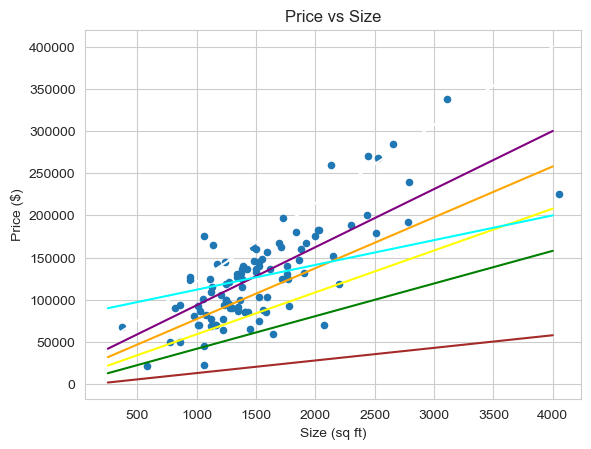

In [7]:
plot = plot_points()

plot.plot([250, 4000], [2000, 58000], color='brown')
plot.plot([250, 4000], [13000, 158000], color='green')
plot.plot([250, 4000], [22000, 208000], color='yellow')
plot.plot([250, 4000], [32000, 258000], color='orange')
plot.plot([250, 4000], [42000, 300000], color='purple')
plot.plot([250, 4000], [52000, 400000], color='white')
plot.plot([250, 4000], [90000, 200000], color='cyan')



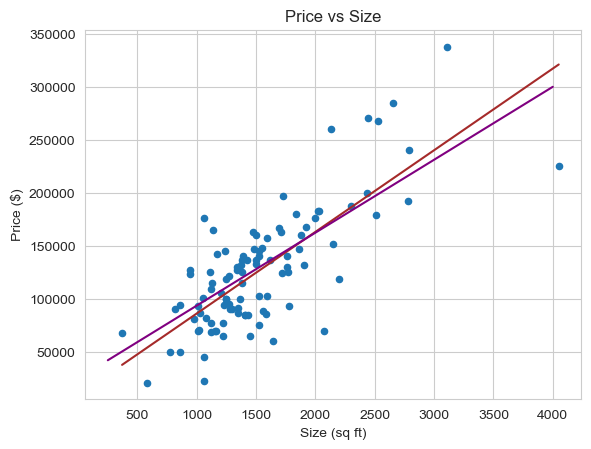

In [8]:
plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')
plot.plot([250, 4000], [42000, 300000], color='purple')

[]

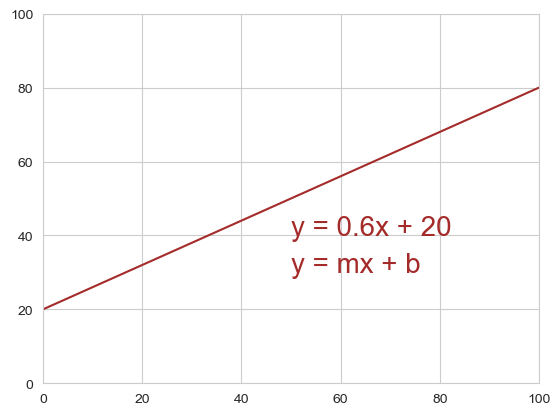

In [9]:
import matplotlib.pyplot as plt

x1, y1 = [0, 100], [20, 80]
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(x1, y1, color='brown')
plt.text(50, 40, 'y = 0.6x + 20', fontsize=20, color='brown')
plt.text(50, 30, 'y = mx + b', fontsize=20, color='brown')
plt.plot()

You can think of this as a function $f(x) = y$. $f$ predicts price $y$ given input square footage $x$. The function is a line, and the line is defined by the slope $m$ and the y-intercept $b$.

In machine learning terms, we rename the variables as follows:
- $x$ is the input variable (independent variable). In neural networks and other classification applications, we call this a **feature**. Square footage is a feature.
- $y$ is the output variable (dependent variable). In neural networks and other classification applications, we call this a **class** or a **label**. Price is a label. In a regression setting, we call the output variable a **target** or **response** or **prediction**, and label it $\hat{y}$.
- $m$ is the slope of the line. In machine learning, we call this the **weight**, and number it, such as $w_1$.
- $b$ is the y-intercept of the line. In machine learning, we call this the **bias**, and number it, such as $b_1$.

The formula of the line becomes:

$\hat{y} = w_1 x_1 + b_1$

This formula will be seen again when we calculate the output of a neuron in a neural network.
For example, here is the intermediate output of a neuron with 3 inputs and 3 weights:
$\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b_1$

The number of **parameters** in a model is the number of weights and biases. In the example above, the number of parameters is 4. In our linear regression model which we seek to build to predict house prices based on square footage, the number of parameters is 2. By comparison,  Chat-GPT 3 has 175 billion parameters, and Chat-GPT 4 is rumored to have 1 trillion parameters.While we will not be working with a model this large, we will see a model to read handwritten digits (MNIST dataset) with over 1.3 million parameters.


## Accurately Measuring Error

We can measure the accuracy of the line by calculating the **mean squared error**. The mean squared error is the average of the squared differences between the predicted values and the actual values. The lower the mean squared error, the better the model.

The formula for the mean squared error is:
$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$

In machine learning, we use the term **loss** instead of error. The square of the difference is called the **L2 loss** in a machine learning context. There are many types of **loss functions** that could be used, especially for classification problems with more parameters.

### MSE Example

![MSE exercise](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/mse.png)

In the above chart:
- the loss for the point at $(1,2)$ is $0.6$
- the loss for the point at $(2,1)$ is $-0.8$
- the loss for the point at $(4.3)$ is $0.25$

The MSE is:

$\frac{1}{3} \times (0.6^2 + -0.8^2 + 0.25^2) = 0.354$

Plotting a bunch of random lines and calculating the mean squared error and selecting the lowest error will not converge to the best line, since there are an infinite number of lines that can be drawn. We need to use an **optimization algorithm** to find the best line. The optimization algorithm will start with a random line, and then iteratively improve the line by moving it in the direction of the steepest **descent**. The steepest descent is the direction of the greatest decrease in the loss function. The optimization algorithm will continue to move the line in the direction of the steepest descent until the loss function is minimized. We need a method that **converges** on the correct solution.


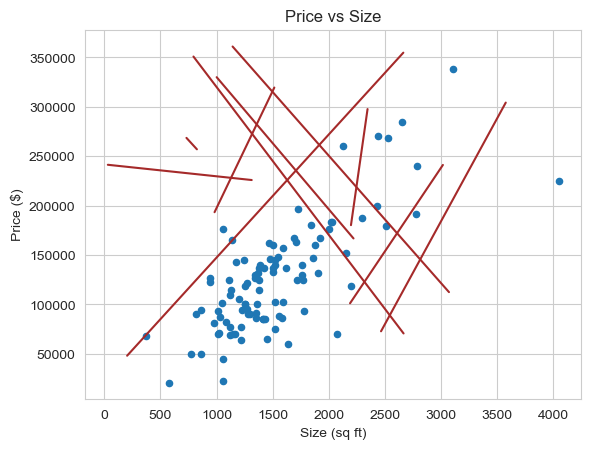

In [10]:
import random

plot = data.plot.scatter(x='size', y='price')
plot.set_title('Price vs Size')
plot.set_xlabel('Size (sq ft)')
plot.set_ylabel('Price ($)')
for i in range(10):
    plot.plot([random.uniform(0, 4000), random.uniform(0, 4000)],
              [random.uniform(0, 400000), random.uniform(0, 400000)], color='brown')

Mean squared error at m=100.000000: 17343434400.00


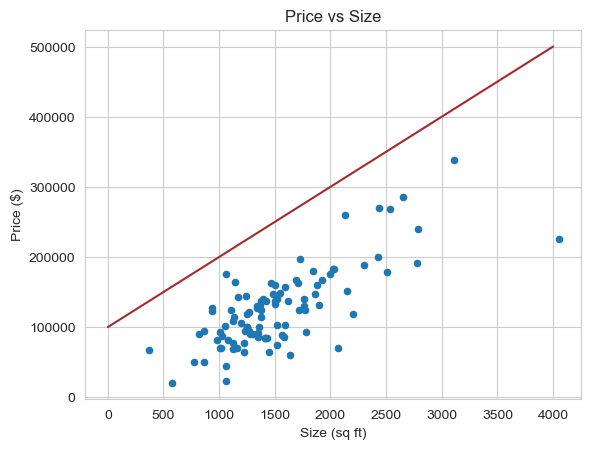

In [12]:
from sklearn.metrics import mean_squared_error

plot = plot_points()

b = 0
m = 0
plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
y = data['price'].values
y_hat = m * data['size'].values + b
loss = mean_squared_error(y, y_hat)
print('Mean squared error at m=%f: %.2f' % (m, loss))

Mean squared error at m=    0: 19196708400.00
Mean squared error at m=    5: 17092212875.00
Mean squared error at m=   10: 15119560700.00
Mean squared error at m=   15: 13278751875.00
Mean squared error at m=   20: 11569786400.00
Mean squared error at m=   25: 9992664275.00
Mean squared error at m=   30: 8547385500.00
Mean squared error at m=   35: 7233950075.00
Mean squared error at m=   40: 6052358000.00
Mean squared error at m=   45: 5002609275.00
Mean squared error at m=   50: 4084703900.00
Mean squared error at m=   55: 3298641875.00
Mean squared error at m=   60: 2644423200.00
Mean squared error at m=   65: 2122047875.00
Mean squared error at m=   70: 1731515900.00
Mean squared error at m=   75: 1472827275.00
Mean squared error at m=   80: 1345982000.00
Mean squared error at m=   85: 1350980075.00
Mean squared error at m=   90: 1487821500.00
Mean squared error at m=   95: 1756506275.00
Mean squared error at m=  100: 2157034400.00
Mean squared error at m=  105: 2689405875.00
Mean 

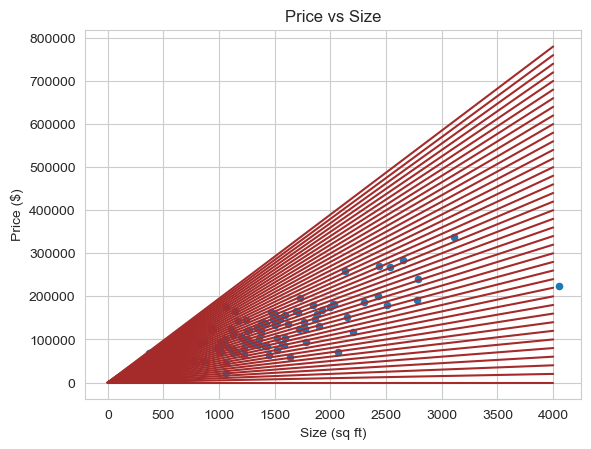

In [13]:
plot = plot_points()

b = 0
for m in range(0, 200, 5):
    plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    print('Mean squared error at m=%5.0f: %.2f' % (m, loss))

Min loss: 1332160028.00 is at slope 82.00


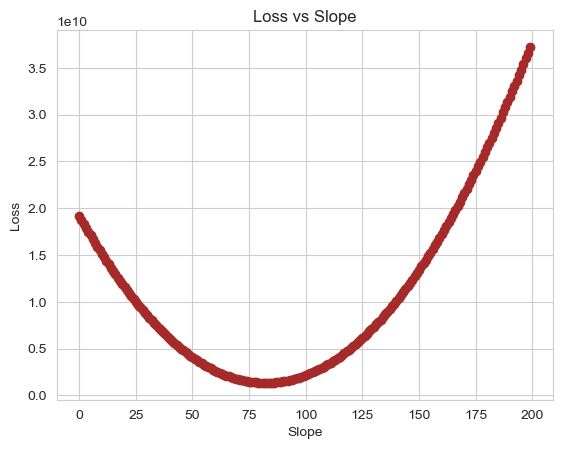

In [16]:
import sys

b = 0
min_slope = 0
min_loss = sys.float_info.max
for m in range(0, 200, 1):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(m, loss, 'o', color='brown')
    plt.title('Loss vs Slope')
    plt.xlabel('Slope')
    plt.ylabel('Loss')
print('Min loss: %.2f is at slope %.2f' % (min_loss, min_slope))

Min loss: 1329994428.00 is at intercept 0.00


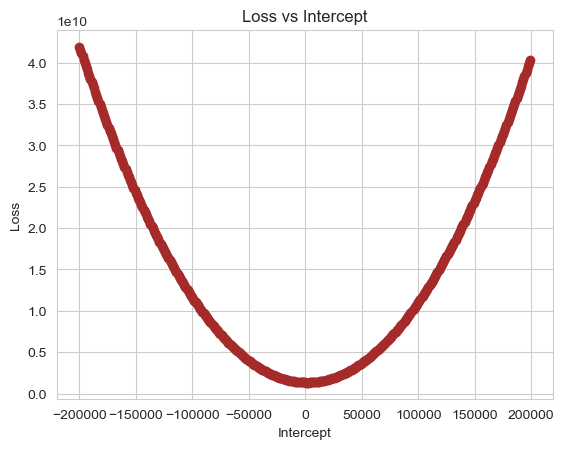

In [145]:
m = 82
min_b = 0
min_loss = sys.float_info.max
for b in range(-200000, 200000, 1000):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(b, loss, 'o', color='brown')
    plt.title('Loss vs Intercept')
    plt.xlabel('Intercept')
    plt.ylabel('Loss')
print('Min loss: %.2f is at intercept %.2f' % (min_loss, min_b))

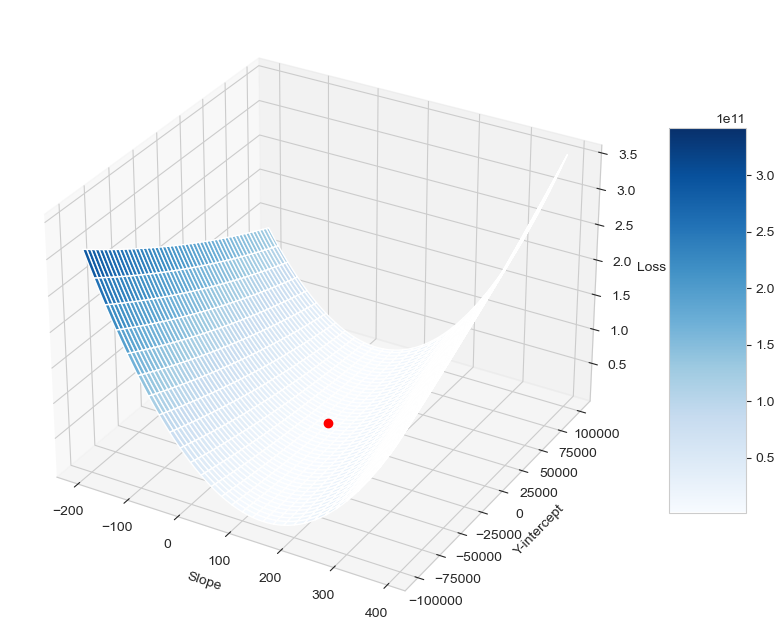

In [17]:
def error(m, b):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    return mean_squared_error(y, y_hat)


m = np.arange(-200, 400, 10)
b = np.arange(-100_000, 100_000, 1_000)

M, B = np.meshgrid(m, b)
E = np.vectorize(error)(M, B)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.view_init(30, -60)
fig.colorbar(surface, shrink=0.5, aspect=5)
ax.plot3D([77], [9161], [min_loss], 'o', color='red')


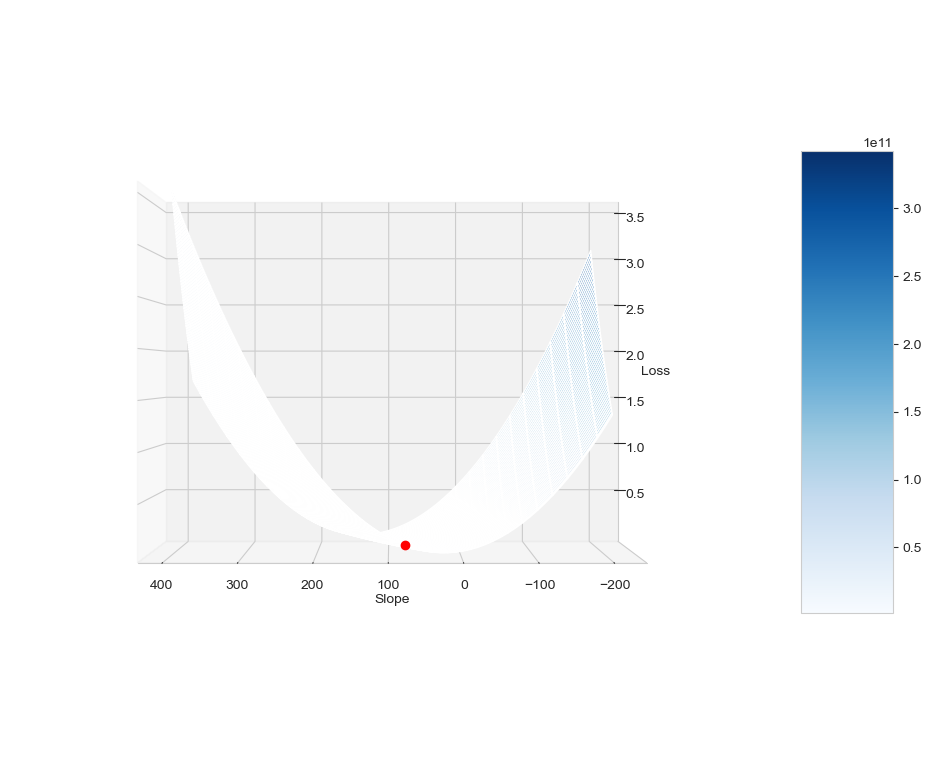

In [147]:
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.get_yaxis().set_ticks([])
ax.set_zlabel('Loss')
ax.plot3D([77], [9161], [min_loss], 'o', color='red')
ax.view_init(0, 90)  # slope vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

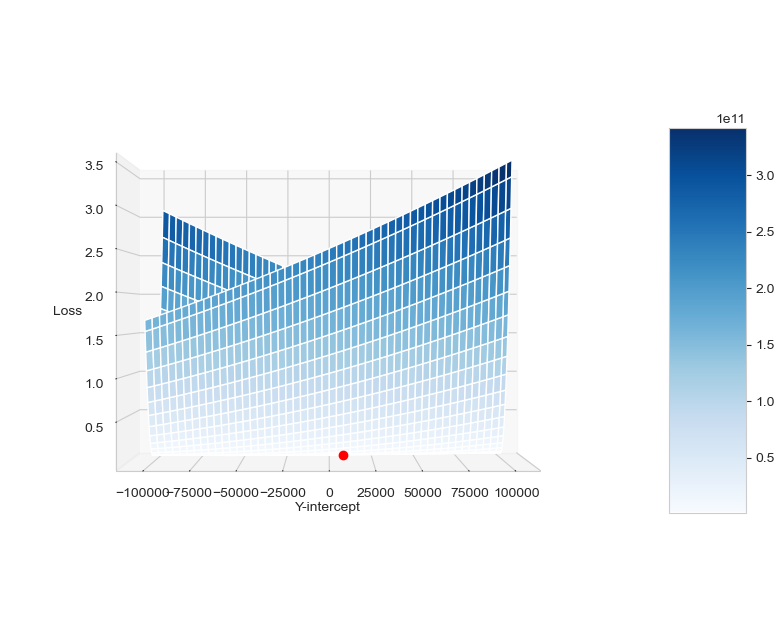

In [148]:

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.plot3D([77], [8161], [min_loss], 'o', color='red')
ax.view_init(0, 0)  # y-intercept vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

## A complex loss landscape

https://www.cs.umd.edu/~tomg/projects/landscapes/

![loss landscape](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/noshort.png)

## A perceptron
![perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron.drawio.png)


Ignoring the **activation function** $\sigma$ for the moment, the output at $y$ is $x_1 \times w_1 + x_2 \times w_2 + ... +x_n \times w_n +b$, more concisely expressed as $b+\sum_{i=1}^n X_i \times W_i$.

## A perceptron with a single input

![single input perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron1.drawio.png)

Again ignoring the activation function, $y = w_1 \times x_1 + b $.

## Working with arrays


In [149]:
a = np.array([1, 2, 3, 4, 5])
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')

Array: [1 2 3 4 5]
Array shape: (5,)
Array type: int32


In [150]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float32)
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')
print(f'Mean: {a.mean()}')
print(f'Sum: {a.sum()}')
print(f'a *2.5 = {a * 2.5}')
b = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=np.float32)
print(f'b = {b}')
print(f'a + b = {a + b}')
print(f'a * b = {a * b}')
print(f'dot product = {np.dot(a, b)}')

Array: [1. 2. 3. 4. 5.]
Array shape: (5,)
Array type: float32
Mean: 3.0
Sum: 15.0
a *2.5 = [ 2.5  5.   7.5 10.  12.5]
b = [0.1 0.2 0.3 0.4 0.5]
a + b = [1.1 2.2 3.3 4.4 5.5]
a * b = [0.1        0.4        0.90000004 1.6        2.5       ]
dot product = 5.5


![perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron.drawio.png)

Weights:
$\vec{w}= [w_1, w_2, ..., w_n]$

Inputs:
$\vec{x}= [x_1, x_2, ..., x_n]$

$b$ is the bias

$\vec{w} \cdot \vec{x} + b = \sum_{i=1}^n w_i \times x_i + b$

## Working with Tensors

In [18]:
import torch

a = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32, requires_grad=True)
print(f'Tensor a: {a}')
b = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5], dtype=torch.float32, requires_grad=True)
print(f'Tensor b: {b}')
c = torch.dot(a, b)
print(f'torch.dot(a, b) = {c}')


Tensor a: tensor([1., 2., 3., 4., 5.], requires_grad=True)
Tensor b: tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000], requires_grad=True)
torch.dot(a, b) = 5.5


In [152]:
x = torch.tensor(8.0, requires_grad=True)
print("x:", x)

x: tensor(8., requires_grad=True)


In [153]:
y = x ** 2 + 10
print("y:", y)

y: tensor(74., grad_fn=<AddBackward0>)


In [154]:
y.backward()
dx = x.grad
print("x.grad :", dx)


x.grad : tensor(16.)


$\frac{dy}{dx} = \frac{d (x^2 + 10 )}{dx} = 2x$

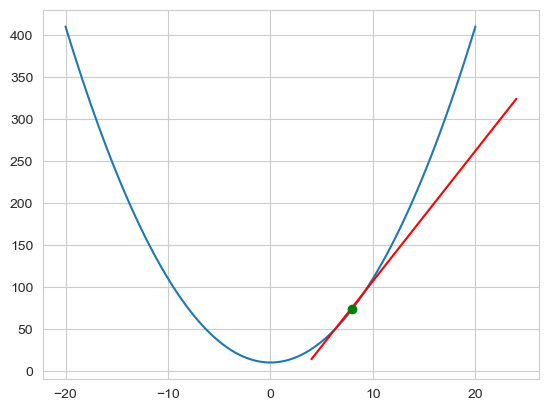

In [155]:
x = np.linspace(-20, 20, 100)
y = np.array([j * j + 10 for j in x])
plt.plot(x, y)
plt.plot([4, 24], [14, 324], color='red')
plt.plot(8, 74, 'o', color='green')


![NMIST number classification](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/nn.gif)


## Creating a model with PyTorch

1. Prepare the data
2. Define the model
3. Define the loss function
4. Define the optimizer
5. Train the model (loop):
    1. Make a prediction
    2. Calculate the loss
    3. Calculate the gradients
    4. Update the weights
6. Evaluate the model


In [19]:
import torch

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("Running on {}".format(dev))

Running on cuda:0


In [20]:

from torch.autograd import Variable
import torch.nn as nn

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)
        # nn.init.normal_(self.linear.weight, mean=10, std=1.0)
        # nn.init.normal_(self.linear.bias, mean=1000, std=1.0)

    def forward(self, x):
        return self.linear(x)


model = LR()
if torch.cuda.is_available():
    model.cuda()

torch.nn.init.normal_(model.linear.weight)

epochs = 801
loss_function = torch.nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

print('start: weight {} bias {}'.format(model.linear.weight.item(), model.linear.bias.item()))

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {} weight {} bias {}'.format(epoch, loss.item(), model.linear.weight.item(),
                                                           model.linear.bias.item()))

print(f'm = {model.linear.weight.item()}')
print(f'b = {1000. * model.linear.bias.item()}')


start: weight -1.151281476020813 bias -0.5722489356994629
epoch 0, loss 19847.298828125 weight 43.038902282714844 bias 25.23324203491211
epoch 50, loss 1337.379638671875 weight 70.30818176269531 bias 20.355480194091797
epoch 100, loss 1324.786865234375 weight 74.20951080322266 bias 13.83668041229248
epoch 150, loss 1322.5899658203125 weight 75.83897399902344 bias 11.113985061645508
epoch 200, loss 1322.206787109375 weight 76.51956176757812 bias 9.976787567138672
epoch 250, loss 1322.1400146484375 weight 76.80381774902344 bias 9.50181770324707
epoch 300, loss 1322.12841796875 weight 76.92253875732422 bias 9.303449630737305
epoch 350, loss 1322.126220703125 weight 76.97212982177734 bias 9.2205810546875
epoch 400, loss 1322.1258544921875 weight 76.99284362792969 bias 9.1859712600708
epoch 450, loss 1322.125732421875 weight 77.0014877319336 bias 9.171525955200195
epoch 500, loss 1322.125732421875 weight 77.00509643554688 bias 9.165497779846191
epoch 550, loss 1322.1258544921875 weight 77.0

### Compute $r^2$ Score

$r^2$ = 1 - $\frac{SS_{res}}{SS_{tot}}$

The proportion of the variation in the dependent variable that is predictable from the independent variable(s).

In [158]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_hat = model(inputs).to('cpu').numpy()
    r_squared = r2_score(y_train, y_hat)
    print(f'the coefficient of determination = {r_squared}')


the coefficient of determination = 0.5795200295534196


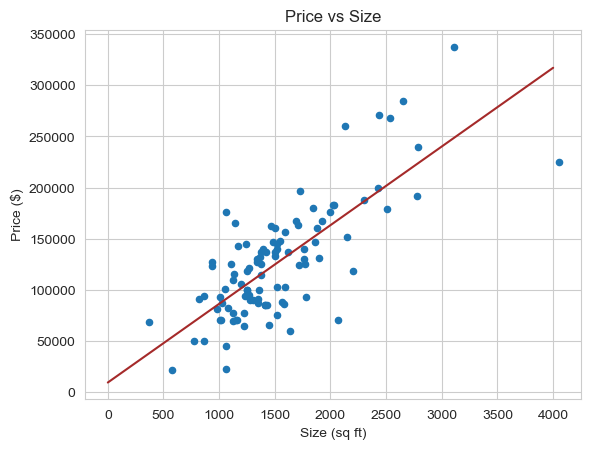

In [21]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')


## Split the input data into training and test sets

In [22]:
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import torch.nn as nn

x_train, x_test, y_train, y_test = train_test_split(data['size'].values.astype(np.float32),
                                                    data['price'].values.astype(np.float32),
                                                    test_size=0.2)

x_train = (x_train / 1000.)
y_train = (y_train / 1000.)


class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = LR()
if torch.cuda.is_available():
    model.cuda()

torch.nn.init.normal_(model.linear.weight)

epochs = 801
loss_function = torch.nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

print('start: weight {} bias {}'.format(model.linear.weight.item(), model.linear.bias.item()))

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {} weight {} bias {}'.format(epoch, loss.item(), model.linear.weight.item(),
                                                           model.linear.bias.item()))

print(f'm = {model.linear.weight.item()}')
print(f'b = {1000. * model.linear.bias.item()}')


start: weight -0.08267749845981598 bias -0.1851416826248169
epoch 0, loss 20911.044921875 weight 46.843292236328125 bias 26.208314895629883
epoch 50, loss 1350.9735107421875 weight 72.1507797241211 bias 19.453628540039062
epoch 100, loss 1339.965087890625 weight 75.6722183227539 bias 13.348191261291504
epoch 150, loss 1338.366455078125 weight 77.01416778564453 bias 11.021543502807617
epoch 200, loss 1338.13427734375 weight 77.52555084228516 bias 10.134912490844727
epoch 250, loss 1338.1004638671875 weight 77.72042846679688 bias 9.797029495239258
epoch 300, loss 1338.0955810546875 weight 77.79469299316406 bias 9.668274879455566
epoch 350, loss 1338.094970703125 weight 77.82299041748047 bias 9.619207382202148
epoch 400, loss 1338.0947265625 weight 77.83377838134766 bias 9.600506782531738
epoch 450, loss 1338.0948486328125 weight 77.837890625 bias 9.59338092803955
epoch 500, loss 1338.094970703125 weight 77.83944702148438 bias 9.590673446655273
epoch 550, loss 1338.0948486328125 weight 77

the loss = 2688.713623046875 and r-squared is 0.2503570460358949


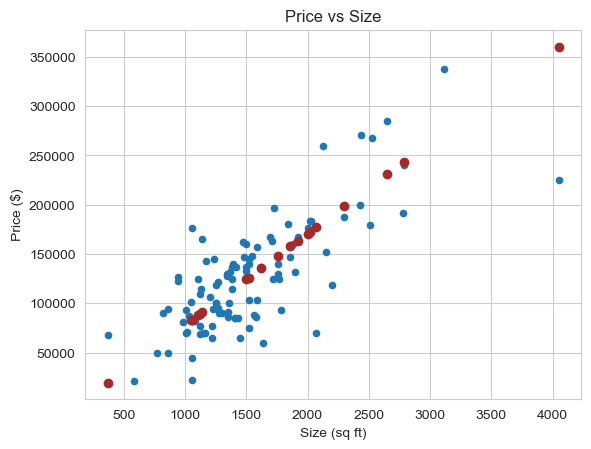

In [161]:
plot_points()

x_tensor = Variable(torch.from_numpy(x_test / 1000.)).reshape(-1, 1).to(dev)
y_tensor = Variable(torch.from_numpy(y_test / 1000.)).reshape(-1, 1).to(dev)

with torch.no_grad():
    y_hat_tensor = model(x_tensor)
    loss = loss_function(y_hat_tensor, y_tensor)

y_hat = y_hat_tensor.to('cpu').numpy().reshape(-1) * 1000.

r_squared = r2_score(y_test, y_hat)

print(f'the loss = {loss.item()} and r-squared is {r_squared}')

plt.plot(x_test, y_hat, 'o', color='brown')

## Add non-linearity

No matter how hard you try, you cannot fit a non-linear function with a model that only performs linear operations. The only way to fit a non-linear function is to add non-linear operations to the model.
Some of the most common non-linear operations are:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh
- Softmax

Generally, we will use ReLU in the hidden layers and Sigmoid or Tanh in the output layer (or sometimes nothing, depending on the problem).


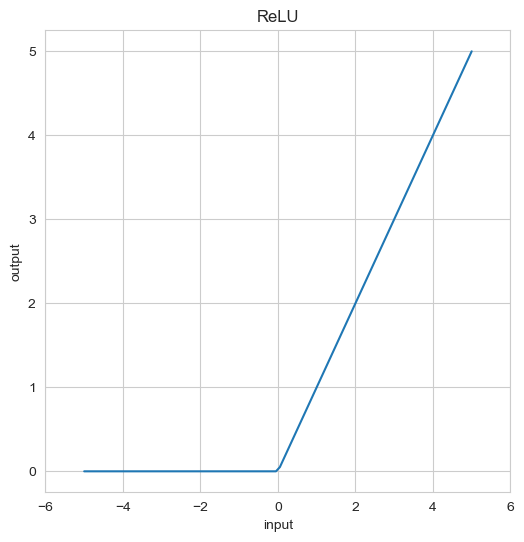

In [162]:
fig = plt.figure(figsize=(6, 6))
plt.title('ReLU')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), np.maximum(np.linspace(-5, 5, 100), 0))


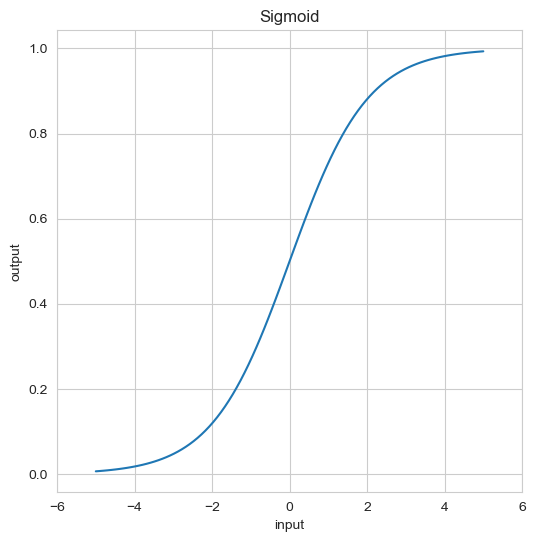

In [163]:
fig = plt.figure(figsize=(6, 6))
plt.title('Sigmoid')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), 1 / (1 + np.exp(-np.linspace(-5, 5, 100))))


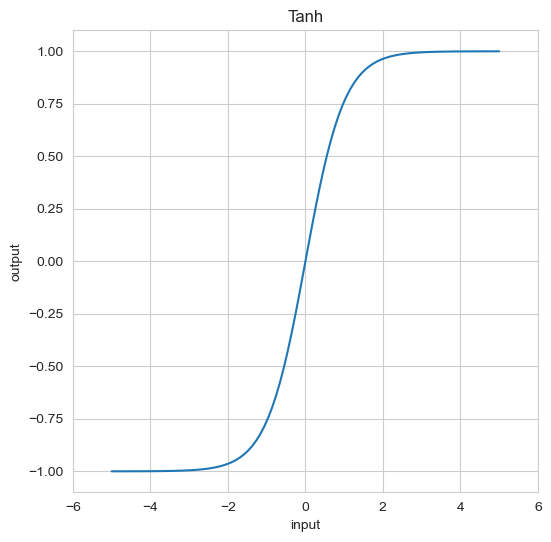

In [164]:
fig = plt.figure(figsize=(6, 6))
plt.title('Tanh')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), np.tanh(np.linspace(-5, 5, 100)))

## Layers
There are many types of layers in PyTorch, such as:
- Linear
- Convolutional
- Recurrent
- Pooling
- Dropout
- BatchNorm
- Embedding

A layer has an input shape and an output shape.

For example, the following layer has an input shape of 2 and an output shape of 3:

```python
layer = nn.Linear(2, 3)
```

This layer has 3 neurons, each of which has 2 weights and 1 bias, and takes inout from a previous later with 2 inputs.



![3 neurons](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/3-2-node.png)

[A tool for drawing neural networks](https://alexlenail.me/NN-SVG/)

## Rerun the model with non-linear layers

![1-3-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/1-3-1.png)



In [165]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR2(nn.Module):
    def __init__(self):
        super(LR2, self).__init__()
        n_dense = 3
        self.layer1 = nn.Linear(1, n_dense)
        self.layer2 = nn.Linear(n_dense, 1)

    def forward(self, x):
        o1 = F.sigmoid(self.layer1(x))
        return self.layer2(o1)


model = LR2()
if torch.cuda.is_available():
    model.cuda()

# torch.nn.init.normal_(model.linear.weight)

epochs = 20_001
loss_function = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 19247.26171875
epoch 50, loss 2754.8037109375
epoch 100, loss 2053.3291015625
epoch 150, loss 1675.4385986328125
epoch 200, loss 1506.9837646484375
epoch 250, loss 1395.309326171875
epoch 300, loss 1332.758544921875
epoch 350, loss 1289.6473388671875
epoch 400, loss 1266.072509765625
epoch 450, loss 1251.403564453125
epoch 500, loss 1241.63671875
epoch 550, loss 1234.689453125
epoch 600, loss 1229.3421630859375
epoch 650, loss 1224.985107421875
epoch 700, loss 1221.3056640625
epoch 750, loss 1218.1243896484375
epoch 800, loss 1215.3238525390625
epoch 850, loss 1212.824462890625
epoch 900, loss 1210.5716552734375
epoch 950, loss 1208.525390625
epoch 1000, loss 1206.6558837890625
epoch 1050, loss 1204.93994140625
epoch 1100, loss 1203.358154296875
epoch 1150, loss 1201.894775390625
epoch 1200, loss 1200.5362548828125
epoch 1250, loss 1199.27099609375
epoch 1300, loss 1198.08935546875
epoch 1350, loss 1196.9832763671875
epoch 1400, loss 1195.9451904296875
epoch 1450, loss 11

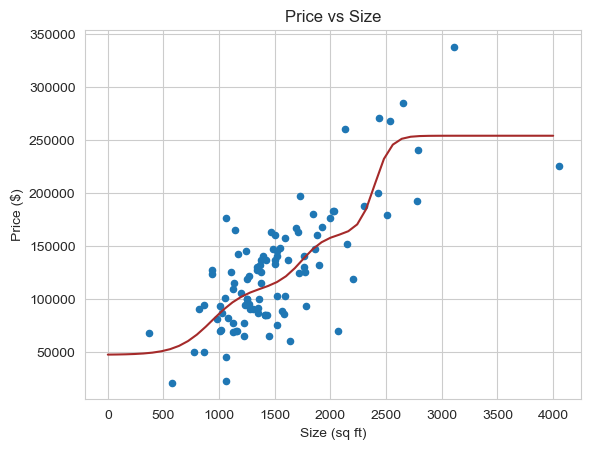

In [166]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')

## Bigger and Better?

![1-32-32-32-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/1-32-32-32-1.png)

385 nodes, 32896 edges (32896 weights, 385 biases)


In [23]:

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR2(nn.Module):
    def __init__(self):
        super(LR2, self).__init__()
        n_depth = 128
        self.layer1 = nn.Linear(1, n_depth)
        self.layer2 = nn.Linear(n_depth, n_depth)
        self.layer3 = nn.Linear(n_depth, 1)

    def forward(self, x):
        o1 = F.sigmoid(self.layer1(x))
        o2 = F.sigmoid(self.layer2(o1))
        return self.layer3(o2)


model = LR2()
if torch.cuda.is_available():
    model.cuda()

# torch.nn.init.normal_(model.linear.weight)

epochs = 30_001
loss_function = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 19167.537109375
epoch 50, loss 2886.67236328125
epoch 100, loss 2346.2705078125
epoch 150, loss 1841.0321044921875
epoch 200, loss 1567.234619140625
epoch 250, loss 1418.0399169921875
epoch 300, loss 1338.1046142578125
epoch 350, loss 1293.572265625
epoch 400, loss 1253.9892578125
epoch 450, loss 1230.8109130859375
epoch 500, loss 1215.7061767578125
epoch 550, loss 1204.6475830078125
epoch 600, loss 1196.1942138671875
epoch 650, loss 1189.696533203125
epoch 700, loss 1183.8016357421875
epoch 750, loss 1178.990478515625
epoch 800, loss 1175.924560546875
epoch 850, loss 1173.5516357421875
epoch 900, loss 1171.185791015625
epoch 950, loss 1169.0286865234375
epoch 1000, loss 1167.145263671875
epoch 1050, loss 1165.4615478515625
epoch 1100, loss 1163.8280029296875
epoch 1150, loss 1161.731689453125
epoch 1200, loss 1159.1712646484375
epoch 1250, loss 1157.1116943359375
epoch 1300, loss 1155.9130859375
epoch 1350, loss 1155.5093994140625
epoch 1400, loss 1155.8187255859375
epoc

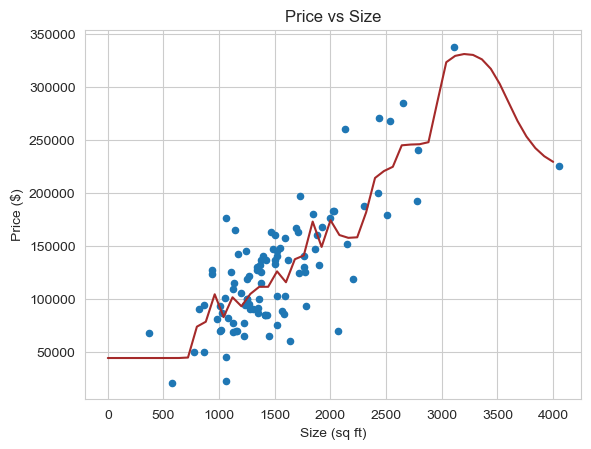

In [168]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')

## Classification

XNOR

| A | B | Result |
|---|---|--------|
| 0 | 0 | 1      |
| 0 | 1 | 0      |
| 1 | 0 | 0      |
| 1 | 1 | 1      |



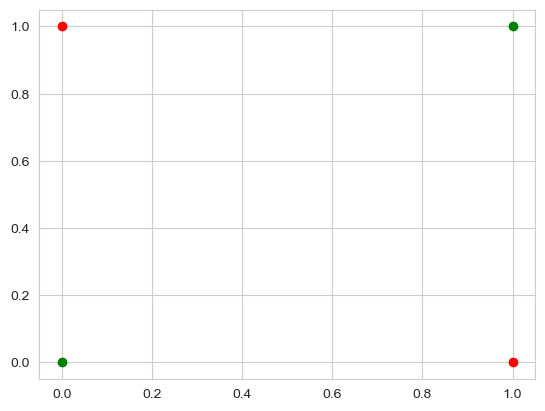

In [169]:
plt.plot(0, 0, 'o', color='green')
plt.plot(0, 1, 'o', color='red')
plt.plot(1, 0, 'o', color='red')
plt.plot(1, 1, 'o', color='green')


### Prepare the data


In [170]:
import numpy as np

x_0 = np.random.randint(0, 2, 1600).astype(np.float32)
x_1 = np.random.randint(0, 2, 1600).astype(np.float32)
y = np.array([1 if x_0[i] == x_1[i] else 0 for i in range(len(x_0))]).astype(np.float32)
print(f'x_0: {x_0[:10]}')
print(f'x_1: {x_1[:10]}')
print(f'y  : {y[:10]}')

inputs = np.array([x_0, x_1]).T

x_train, x_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2)

x_0: [1. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
x_1: [0. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
y  : [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]


### Design the Model

![2-2-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/2-2-1.png)


In [171]:
class XNOR(nn.Module):
    def __init__(self, debug=False):
        super(XNOR, self).__init__()
        n_depth = 2
        self.layer1 = nn.Linear(2, n_depth)
        self.layer2 = nn.Linear(n_depth, 1)
        self.debug = debug

    def forward(self, x):
        o1 = torch.sigmoid(self.layer1(x))
        o2 = self.layer2(o1)
        if self.debug:
            print(f'x: {x} o1: {o1} o2: {o2}')
        return o2


xnor_model = XNOR()


### Train the Model


In [172]:
learning_rate = 0.1
epochs = 10_000
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(xnor_model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

last_loss = sys.float_info.max

for epoch in range(epochs + 1):
    optimizer.zero_grad()

    Y_hat = xnor_model(inputs)
    loss = loss_function(Y_hat, labels.reshape(-1, 1))
    loss.backward()
    optimizer.step()

    if (epoch % 50) == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    if last_loss == loss.item():
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        break
    last_loss = loss.item()


epoch 0, loss 0.4501792788505554
epoch 50, loss 0.25254887342453003
epoch 100, loss 0.25183218717575073
epoch 150, loss 0.2513182759284973
epoch 200, loss 0.2509365975856781
epoch 250, loss 0.2506440579891205
epoch 300, loss 0.25041303038597107
epoch 350, loss 0.25022539496421814
epoch 400, loss 0.2500687539577484
epoch 450, loss 0.24993422627449036
epoch 500, loss 0.24981553852558136
epoch 550, loss 0.24970778822898865
epoch 600, loss 0.2496073693037033
epoch 650, loss 0.24951131641864777
epoch 700, loss 0.24941706657409668
epoch 750, loss 0.24932245910167694
epoch 800, loss 0.24922558665275574
epoch 850, loss 0.2491244375705719
epoch 900, loss 0.24901726841926575
epoch 950, loss 0.24890199303627014
epoch 1000, loss 0.24877658486366272
epoch 1050, loss 0.24863867461681366
epoch 1100, loss 0.24848568439483643
epoch 1150, loss 0.24831457436084747
epoch 1200, loss 0.2481219470500946
epoch 1250, loss 0.24790363013744354
epoch 1300, loss 0.24765467643737793
epoch 1350, loss 0.2473691701889

### Let's look at the parameters and outputs

In [173]:
# print the model parameters
for name, param in xnor_model.named_parameters():
    print(name, param.data)


inputs=Variable(torch.from_numpy(np.array([0,0]).astype(np.float32)))
debug_xnor_model = XNOR(debug=True)
debug_xnor_model.load_state_dict(xnor_model.state_dict())
model.eval()
with torch.no_grad():
    y_hat=debug_xnor_model(inputs)
    print(f'y_hat: {y_hat}')

layer1.weight tensor([[ 2.6953, -2.7021],
        [ 2.2692, -2.2738]])
layer1.bias tensor([-1.8712,  1.2054])
layer2.weight tensor([[-2.7065,  2.5953]])
layer2.bias tensor([-0.6360])
x: tensor([0., 0.]) o1: tensor([0.1334, 0.7695]) o2: tensor([1.0000])
y_hat: tensor([1.0000])


![ann-2-2-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/ann-2-2-1.png)

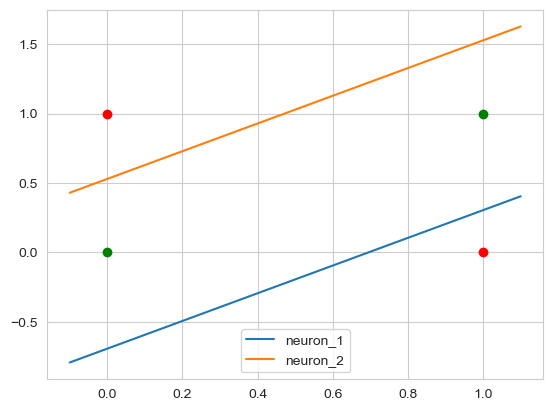

In [174]:
model_params = list(xnor_model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.plot(0, 0, 'o', color='green')
plt.plot(0, 1, 'o', color='red')
plt.plot(1, 0, 'o', color='red')
plt.plot(1, 1, 'o', color='green')
plt.show()

### Test the Model

In [175]:
inputs = Variable(torch.from_numpy(x_test))
labels = Variable(torch.from_numpy(y_test))

with torch.no_grad():
    Y_hat = xnor_model(inputs)
    # print('Y_hat {}'.format(Y_hat))
    loss = loss_function(Y_hat, labels.reshape(-1, 1))
    print('loss {}'.format(loss.item()))


loss 3.3901315782403074e-11
